In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [52]:
img = cv2.imread('impressao-1.jpg', cv2.IMREAD_GRAYSCALE)  # imagem em tons de cinza

In [53]:
def filtro_gabor(orientacao, frequencia=0.6):
    theta = orientacao * np.pi / 180  # converte para radianos
    kernel = cv2.getGaborKernel((21, 21), 4.0, theta, 10.0, 0.5, 0, ktype=cv2.CV_32F)
    return kernel

orientacoes = [0, 45, 90, 135]  # horizontal, 45°, vertical, 135°
filtros = [filtro_gabor(o) for o in orientacoes]

gk = cv2.getGaussianKernel(21, 4).astype(np.float32)
circular_filter = gk @ gk.T
laplaciano = cv2.Laplacian(circular_filter, cv2.CV_32F)
circular_filter = circular_filter - laplaciano



In [54]:
def aplicar_filtros_em_escalas(img, filtros, escalas=[1.0, 0.5, 0.25]):
    respostas = []
    for escala in escalas:
        img_redimensionada = cv2.resize(img, None, fx=escala, fy=escala)
        for k in filtros:
            resposta = cv2.filter2D(img_redimensionada, cv2.CV_32F, k)
            resposta_redimensionada = cv2.resize(resposta, (img.shape[1], img.shape[0]))
            respostas.append(resposta_redimensionada)
    return np.stack(respostas, axis=-1)  # resultado com múltiplas bandas

textura_features = aplicar_filtros_em_escalas(img, filtros)


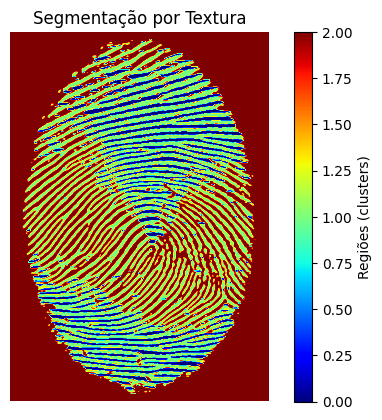

In [55]:
from sklearn.cluster import KMeans

# achata as respostas para aplicar clustering
h, w, d = textura_features.shape
pixels = textura_features.reshape(-1, d)

kmeans = KMeans(n_clusters=3, random_state=42).fit(pixels)
segmentada = kmeans.labels_.reshape(h, w)

plt.imshow(segmentada, cmap='jet')
plt.title('Segmentação por Textura')
plt.axis('off')
cbar = plt.colorbar()
cbar.set_label('Regiões (clusters)')
plt.show()